<a href="https://colab.research.google.com/github/elaisemsunny/linaer-regression/blob/main/linaer_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LINEAR REGRESSION
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

plt.style.use('bmh')
dff=pd.read_csv('gdrive/My Drive/colab/indian_liver_patient.csv')
dff.head()

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

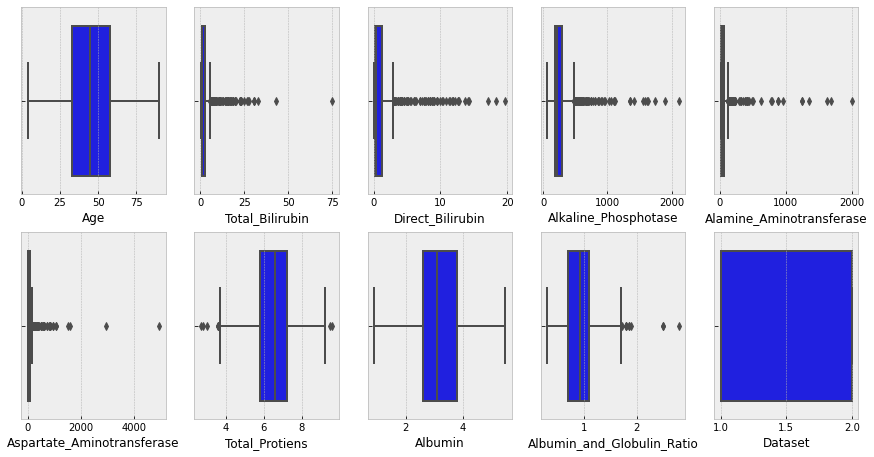

In [2]:
cols = dff.select_dtypes(exclude='object')
q=1
plt.figure(figsize=(15,20))
for col in cols:
   plt.subplot(5,5,q)
   ax = sns.boxplot(dff[col],color='blue')
   plt.xlabel(col)
   q+=1
plt.show()

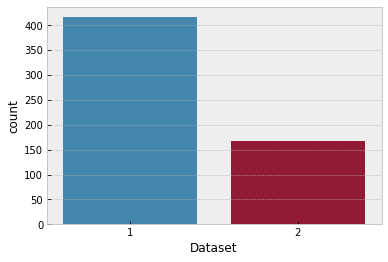

In [3]:
sns.countplot(x=dff['Dataset'],data=dff)
plt.show()

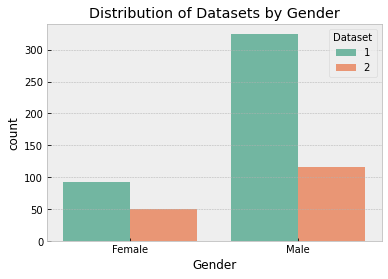

In [4]:
sns.countplot(x='Gender',data=dff,hue='Dataset',palette="Set2")
plt.title('Distribution of Datasets by Gender')
plt.show()

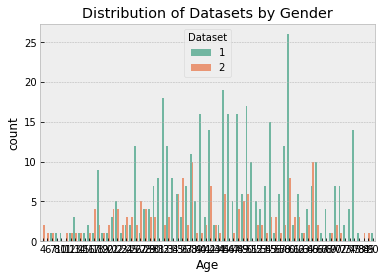

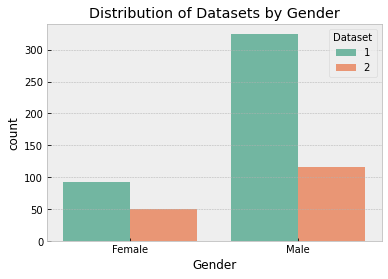

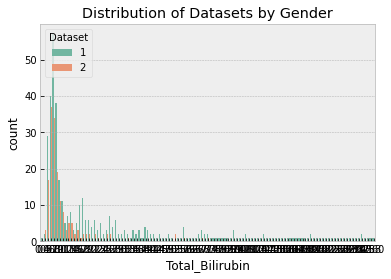

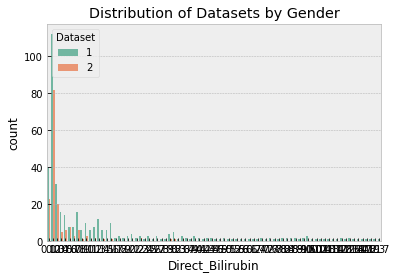

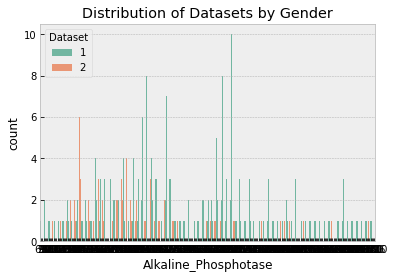

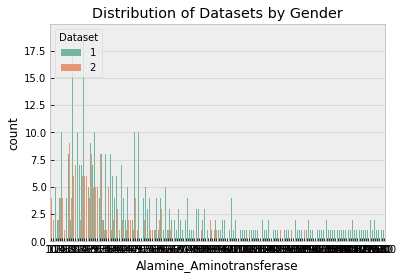

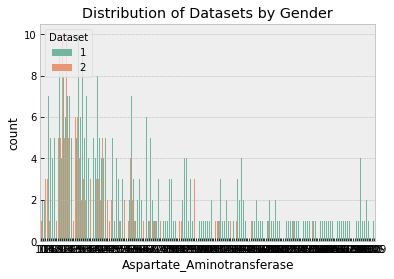

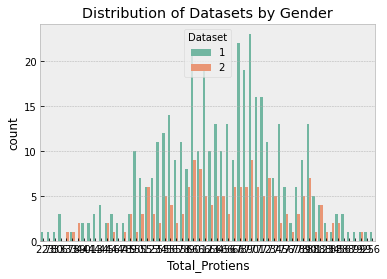

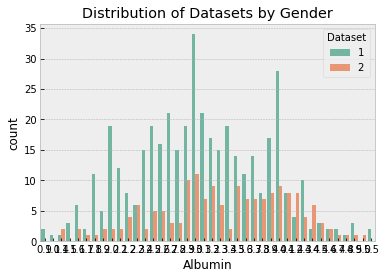

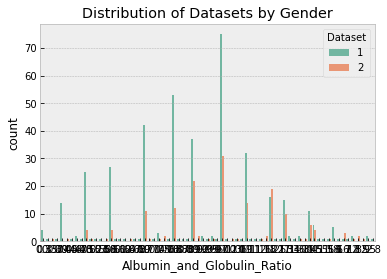

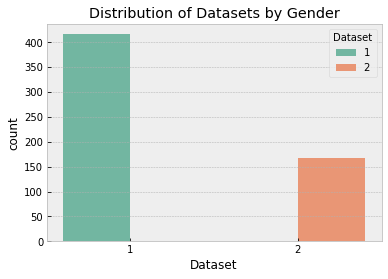

In [5]:
for i in range(0, len(dff.columns)):
    sns.countplot(x=dff.columns[i],data=dff,hue='Dataset',palette="Set2")
    plt.title('Distribution of Datasets by Gender')
    plt.show()

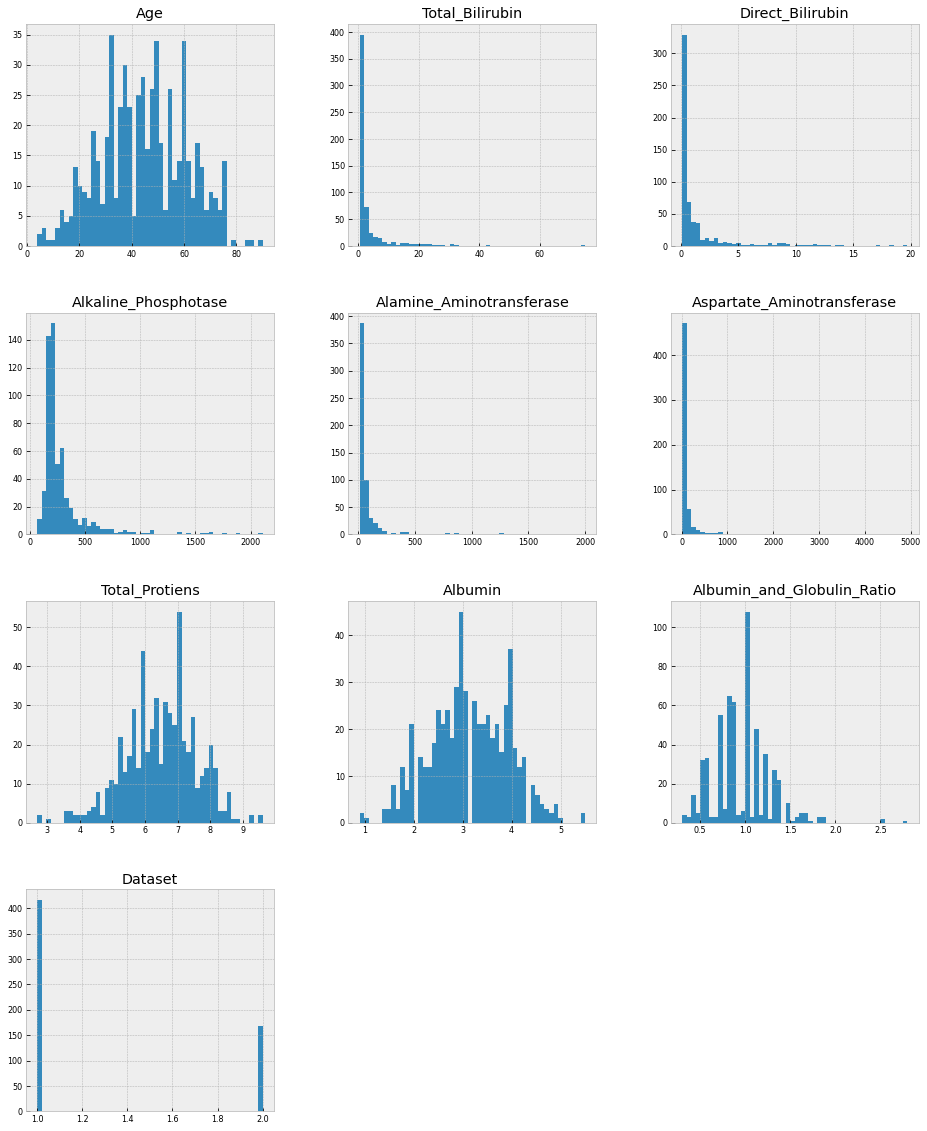

In [6]:
list(set(dff.dtypes.tolist()))
df1 = dff.select_dtypes(include = ['float64', 'int64'])
df1.head()
df1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 


count    583.000000
mean       3.141852
std        0.795519
min        0.900000
25%        2.600000
50%        3.100000
75%        3.800000
max        5.500000
Name: Albumin, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


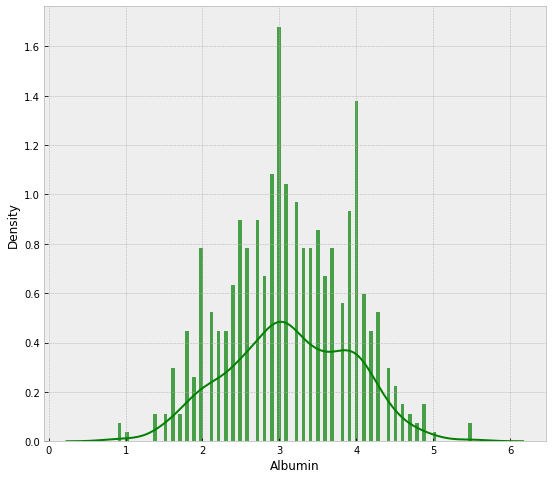

In [7]:
print(dff['Albumin'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dff['Albumin'], color='g', bins=100, hist_kws={'alpha': 0.7});

There is 1 strongly correlated values with Albumin :
Total_Protiens    0.784053
Name: Albumin, dtype: float64


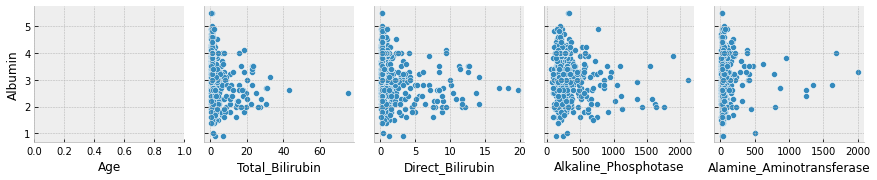

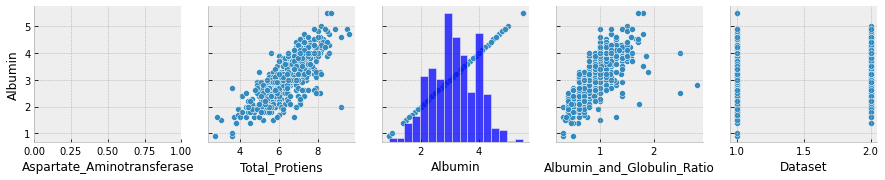

In [8]:
df_num_corr = df1.corr()['Albumin'][:-3] # -1 because the latest row is Total_Protiens 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Albumin :\n{}".format(len(golden_features_list), golden_features_list))

for i in range(0, len(df1.columns), 5):
    sns.pairplot(data=df1,
                x_vars=df1.columns[i:i+5],
                y_vars=['Albumin'])

In [9]:
import operator

individual_features_df = []
for i in range(0, len(df1.columns) - 3): # -6 because the last column is SalePrice
    tmpDf = df1[[df1.columns[i], 'Albumin']]
    tmpDf = tmpDf[tmpDf[df1.columns[i]] != 0]
    individual_features_df.append(tmpDf)


all_correlations = {feature.columns[0]: feature.corr()['Albumin'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

            Age: -0.2659243613007011
Direct_Bilirubin: -0.22853057292087228
Total_Bilirubin: -0.2222504060257662
Alkaline_Phosphotase: -0.16545286617707614
Aspartate_Aminotransferase: -0.0852903016992137
Alamine_Aminotransferase: -0.029741673237366706
 Total_Protiens: 0.7840533353871901


In [10]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with Albumin:\n{}".format(len(golden_features_list), golden_features_list))    

corr = df1.drop('Albumin', axis=1).corr() # We already examined Albumin correlations
plt.figure(figsize=(12, 10))

There is 1 strongly correlated values with Albumin:
['Total_Protiens']


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

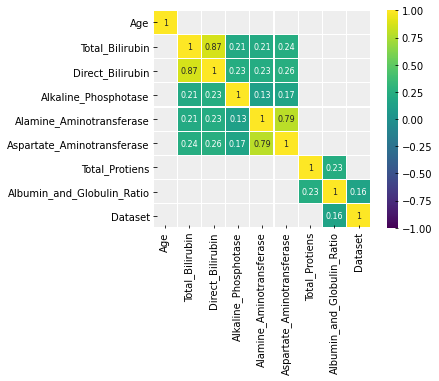

In [11]:
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

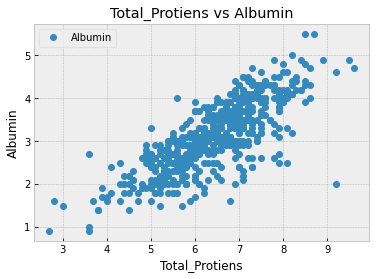

In [12]:
df1.plot(x='Total_Protiens', y='Albumin', style='o')  
plt.title('Total_Protiens vs Albumin')  
plt.xlabel('Total_Protiens')  
plt.ylabel('Albumin')  
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


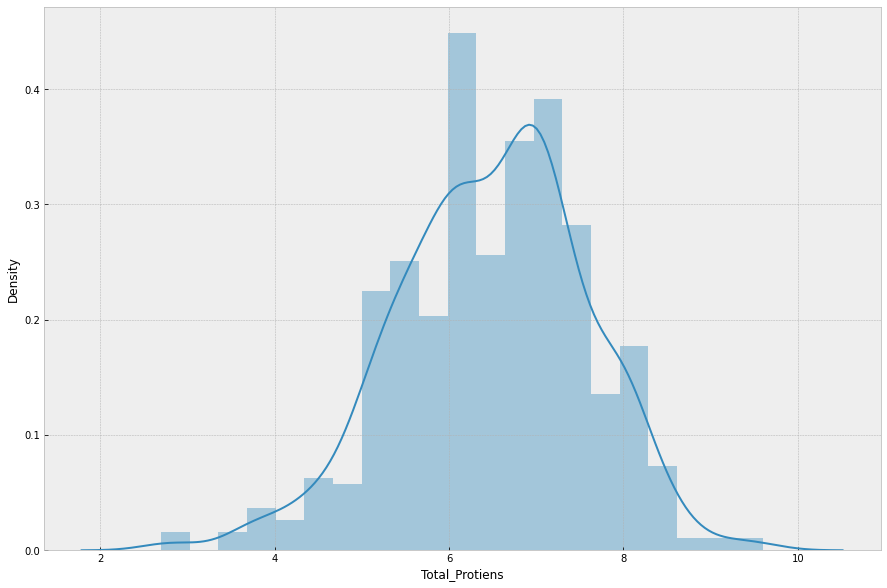

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df1['Total_Protiens'])


[-0.57960423]
[[0.57468509]]


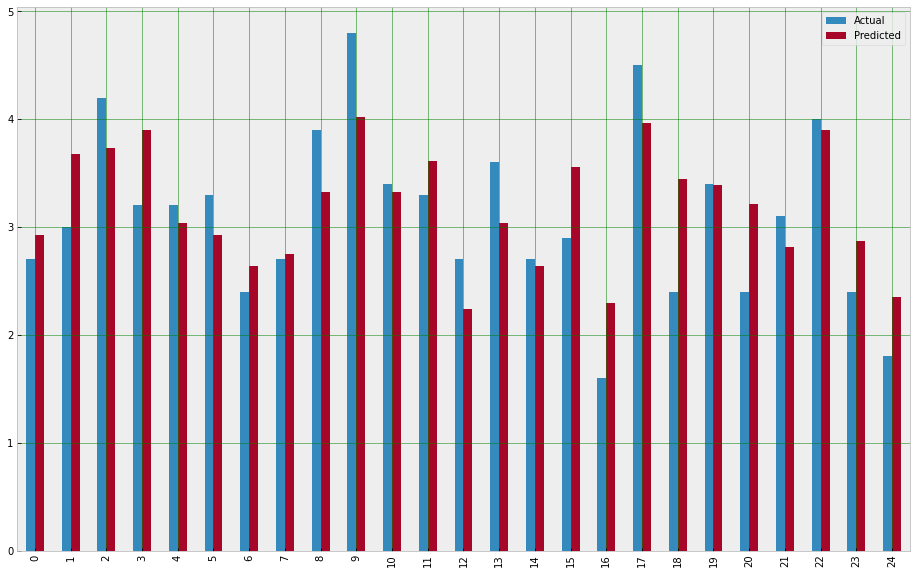

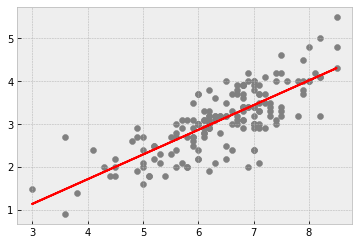

Mean Absolute Error: 0.37123969587274097
Mean Squared Error: 0.22757595087460622
Root Mean Squared Error: 0.4770492122146375
[[2.2938212]]


In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = df1['Total_Protiens'].values.reshape(-1,1)
y = df1['Albumin'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


print(regressor.predict([[5]]))

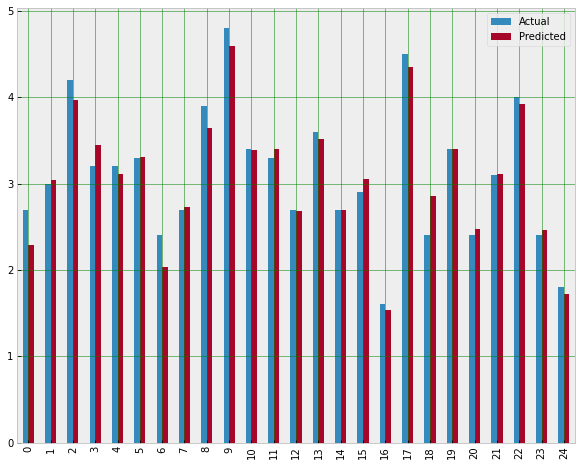

Mean Absolute Error: 0.14235327823810387
Mean Squared Error: 0.05293239913323717
Root Mean Squared Error: 0.2300704221173099


In [15]:
dff.isnull().any()
dff = dff.fillna(method='ffill')
dff.head()
a = dff[['Age' , 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio', 'Dataset']].values
b = dff['Albumin'].values


a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=0)
regressor = LinearRegression()  
regressor.fit(a_train, b_train)



b_pred = regressor.predict(a_test)
df = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, b_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(b_test, b_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred)))